In [120]:
library(ismev)
library(lubridate)

Load in the De Bilt data set (https://climexp.knmi.nl/getdutchtx.cgi?WMO=260&STATION=De_Bilt).

In [98]:
debilt_data = read.table("txtx260.dat", colClasses = c('character', 'numeric'), col.names = c('date', 'maxtemp'))
debilt_data

date,maxtemp
<chr>,<dbl>
19010102,-1.4
19010103,-0.6
19010104,-1.1
19010105,-2.0
19010106,-8.0
19010107,-6.8
19010108,-0.7
19010109,4.4
19010110,6.1


Convert the first column to date format, and exclude all of year 2020 data.

In [123]:
debilt_data = transform(debilt_data, date=ymd(date))
debilt_data_without_2020 = debilt_data[debilt_data$date<ymd(20200101),]
debilt_data_without_2020

,date,maxtemp
,<date>,<dbl>
1,1901-01-02,-1.4
2,1901-01-03,-0.6
3,1901-01-04,-1.1
4,1901-01-05,-2.0
5,1901-01-06,-8.0
6,1901-01-07,-6.8
7,1901-01-08,-0.7
8,1901-01-09,4.4
9,1901-01-10,6.1


Get the yearly max temp:

In [150]:
debilt_yearly_max = aggregate(debilt_data_without_2020, FUN=max, by=list(year=year(debilt_data_without_2020$date)))
debilt_yearly_max

year,date,maxtemp
<dbl>,<date>,<dbl>
1901,1901-12-31,30.3
1902,1902-12-31,31.4
1903,1903-12-31,29.4
1904,1904-12-31,30.7
1905,1905-12-31,29.4
1906,1906-12-31,28.7
1907,1907-12-31,29.1
1908,1908-12-31,28.7
1909,1909-12-31,26.8


Plot the Jan-Dec Max temperature for the years 1901 to 2019 inclusive

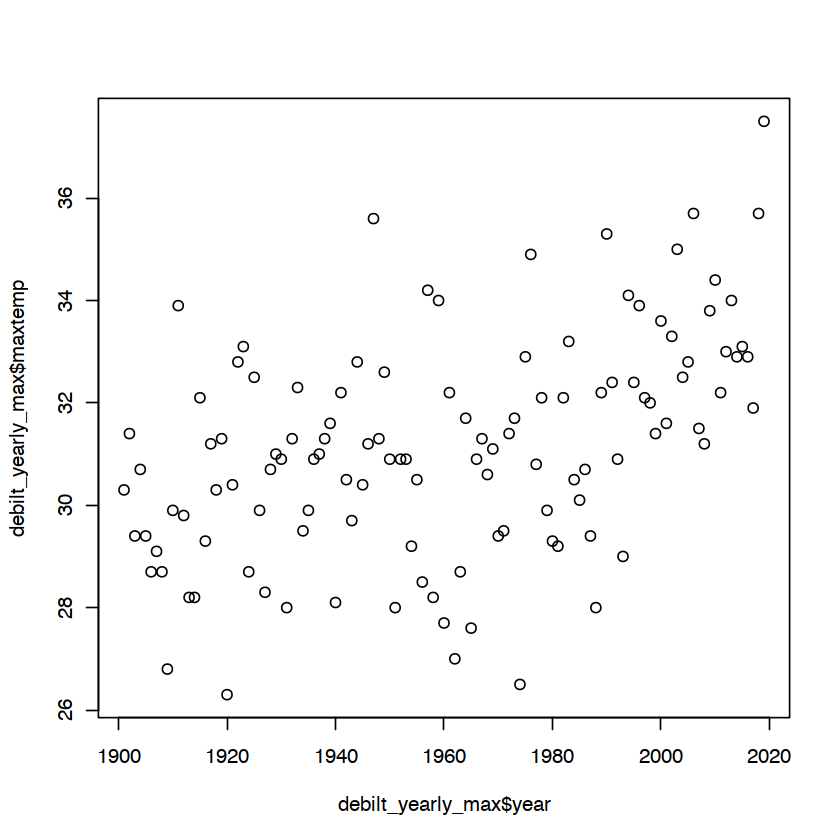

In [153]:
plot(debilt_yearly_max$year, debilt_yearly_max$maxtemp)

In [156]:
out = gev.fit(debilt_yearly_max$maxtemp)

$conv
[1] 0

$nllh
[1] 259.2257

$mle
[1] 30.3008890  2.0708131 -0.2153651

$se
[1] 0.20772282 0.14406144 0.05118591



In [170]:
location = out$mle[1]
scale = out$mle[2]
shape = out$mle[3]